In [1]:
import numpy as np
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("tested.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## most of the missing values are missing from cabin and age.
   - so we will delete the column cabin becoz most of the data is missing.
   

In [8]:
df=df.drop(["Cabin"],axis=1)


## some of the data is also missing from the column age 

In [9]:
df.Age.isna().sum()

86

## Impute the missing Value in age

In [10]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])

## Impute the missing Value in Fare

In [11]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mode()[0])

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## so now we can see There is no missing value present in data set

## Lets do the feature eng.
## Extract the useful info from the data set.

In [13]:
# 01.Survived and died


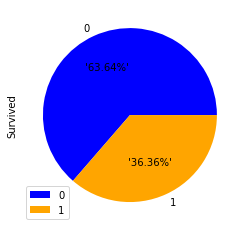

In [14]:
df.Survived.value_counts().plot(kind="pie",autopct=("'%.2f%%' "),colors=["blue","orange"])
plt.legend()
plt.show()


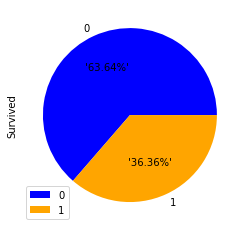

In [15]:
df.Survived.value_counts().plot(kind="pie",autopct=("'%.2f%%' "),colors=["blue","orange"])
plt.legend()
plt.show()

## The no of deaths are 266 & no of living persons are 152

## Ratio between the male and female survived

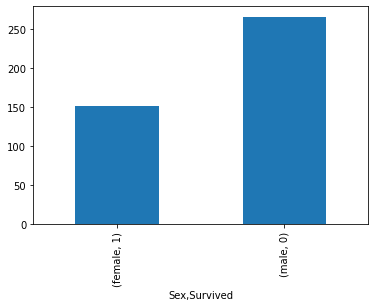

In [16]:
df.groupby(by=["Sex"])["Survived"].value_counts().plot(kind="bar")
plt.show()

## so we can say the death ratio of male is very high as compared to female

# 02.Age

## Details of the person with maximum and minimum age

In [17]:
df.loc[df["Age"]==df["Age"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,S


In [18]:
df.loc[df["Age"]==df["Age"].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,S


## now lets check the :
  - 01. How many childs of range below 12 survived and died.
  - 02. How many adults of range above 12 to 50 survived and died.
  - 03. How many  old of range above 50 died and survived.

In [19]:
## 1st let's count how many childrens are present in the data set
df1=df["Age"]<12
df1.sum()

23

## total number of childerns are 23

In [20]:
pd.crosstab(df["Survived"],df["Age"]<12)

Age,False,True
Survived,,
0,253,13
1,142,10


## Now let's count no of adults in data set.

In [21]:
df1=(df["Age"]>12) & (df["Age"]<=50)
df1.sum()

362

In [22]:
## Total number of Adults are 362.

In [23]:
pd.crosstab(df["Survived"],(df["Age"]>12)&(df["Age"]<=50))

Age,False,True
Survived,,
0,29,237
1,27,125


In [24]:
pd.crosstab(df["Survived"],(df["Age"]>12) & (df["Age"]<=50))

Age,False,True
Survived,,
0,29,237
1,27,125


## Now let's count no of Old people in data set.

In [25]:
df1=df["Age"]>50
df1.sum()

31

In [26]:
## total number of old people are 31

In [27]:
pd.crosstab(df["Survived"], df["Age"]>50)

Age,False,True
Survived,,
0,250,16
1,137,15
